<a href="https://colab.research.google.com/github/anshkotkar/phonepe-pulse-dashboard/blob/main/Phonepe_pulse_data_analysis_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract the data from phonepe pulse github repository through the scripting and clone it

In [1]:
#cloning the repository from git hub
! git clone "http://github.com/PhonePe/Pulse.git"

Cloning into 'Pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


# Transform the data into a suitable format and perform any necessary cleaning and pre-processing steps

In [2]:
# After created the clone of GIT-HUB repository then,
# import libraries for the program

import pandas as pd
import json
import os

Aggregated Transaction

In [3]:
#This is to direct the path to get the data as states

path1 = "/content/Pulse/data/aggregated/transaction/country/india/state"
agg_trans_list = os.listdir(path1)
agg_trans_list

#agg_trans_list--> to get the list of states in India

#This is to extract the data's to create a dataframe
clm = {'State': [], 'Year': [], 'Quater': [], 'Transaction_type': [], 'Transaction_count': [], 'Transaction_amount': []}
for i in agg_trans_list:
  p_i = path1+"/"+i
  agg_yr = os.listdir(p_i)
  for j in agg_yr:
    p_j = p_i+"/"+j
    agg_yr_list = os.listdir(p_j)
    for k in agg_yr_list:
      p_k = p_j+"/"+k
      data = open(p_k, 'r')
      A = json.load(data)
      for z in A['data']['transactionData']:
        Name = z['name']
        count =z['paymentInstruments'][0]['count']
        amount=z['paymentInstruments'][0]['amount']
        clm['Transaction_type'].append(Name)
        clm['Transaction_count'].append(count)
        clm['Transaction_amount'].append(amount)
        clm['State'].append(i)
        clm['Year'].append(j)
        clm['Quater'].append(int(k.strip('.json')))
#create a dataframe
pd.DataFrame(clm)
df_agg = pd.DataFrame(clm)

In [4]:
# Save df_agg to CSV
df_agg.to_csv('phonepe_agg_transaction.csv', index=False)
print("Saved: phonepe_agg_transaction.csv")

Saved: phonepe_agg_transaction.csv


In [5]:
df_agg.head()

State  Year  Quater          Transaction_type  Transaction_count  \
0  assam  2023       1         Merchant payments           48987048   
1  assam  2023       1     Peer-to-peer payments           48461200   
2  assam  2023       1  Recharge & bill payments           16113464   
3  assam  2023       1        Financial Services              82270   
4  assam  2023       1                    Others             116656   

   Transaction_amount  
0        3.941686e+10  
1        1.665092e+11  
2        6.266406e+09  
3        8.697870e+07  
4        7.476826e+07

In [6]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()      # Create a cursor to execute SQL queries

In [7]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS TRANSACTION_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  TRANSACTION_TYPE TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')

In [8]:
#INSERT all the data into table
c.executemany('INSERT INTO TRANSACTION_DATA VALUES(?,?,?,?,?,?)',
              zip(clm['State'], clm['Year'], clm['Quater'], clm['Transaction_type'], clm['Transaction_count'], clm['Transaction_amount']))

In [9]:
#show the data in table format
x = c.execute('SELECT * FROM TRANSACTION_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('assam', '2023', '1', 'Merchant payments', '48987048', '39416860194.0')
('assam', '2023', '1', 'Peer-to-peer payments', '48461200', '166509153749.0')
('assam', '2023', '1', 'Recharge & bill payments', '16113464', '6266406177.0')
('assam', '2023', '1', 'Financial Services', '82270', '86978703.0')
('assam', '2023', '1', 'Others', '116656', '74768264.0')
('assam', '2023', '2', 'Merchant payments', '62403711', '45515248236.0')
('assam', '2023', '2', 'Peer-to-peer payments', '57852989', '182809282981.0')
('assam', '2023', '2', 'Recharge & bill payments', '17858409', '6631355080.0')
('assam', '2023', '2', 'Financial Services', '81172', '84797972.0')
('assam', '2023', '2', 'Others', '94672', '70104514.0')
('assam', '2023', '3', 'Merchant payments', '82126315', '51533166362.0')
('assam', '2023', '3', 'Peer-to-peer payments', '66737077', '185030502675.0')
('assam', '2023', '3', 'Recharge & bill payments', '18524152', '7310558505.0')
('assam', '2023', '3', 'Financial Services', '105975', '11852

In [10]:
#commit the chnages
# This code is used to finalize and safely close your connection with the SQLite database.
con.commit()
con.close()

Aggregated User Data (agg_user)

In [11]:
# Path to aggregated user data
path2 = "/content/Pulse/data/aggregated/user/country/india/state"
agg_user_list = os.listdir(path2)

clm_user = {'State': [], 'Year': [], 'Quater': [], 'Brand': [], 'Count': [], 'Percentage': []}
for i in agg_user_list:
    p_i = os.path.join(path2, i)
    agg_yr = os.listdir(p_i)
    for j in agg_yr:
        p_j = os.path.join(p_i, j)
        agg_yr_list = os.listdir(p_j)
        for k in agg_yr_list:
            p_k = os.path.join(p_j, k)
            with open(p_k, 'r') as data:
                B = json.load(data)
                if B['data']['usersByDevice'] is not None:
                    for z in B['data']['usersByDevice']:
                        clm_user['State'].append(i)
                        clm_user['Year'].append(j)
                        clm_user['Quater'].append(int(k.strip('.json')))
                        clm_user['Brand'].append(z['brand'])
                        clm_user['Count'].append(z['count'])
                        clm_user['Percentage'].append(z['percentage'])

# Create DataFrame
df_user = pd.DataFrame(clm_user)

In [12]:
df_user.to_csv('phonepe_user.csv', index=False)
print("Saved: phonepe_user.csv")

Saved: phonepe_user.csv


In [13]:
df_user.head()

State  Year  Quater    Brand   Count  Percentage
0  assam  2018       1   Xiaomi  101793    0.264235
1  assam  2018       1  Samsung   61603    0.159909
2  assam  2018       1     Vivo   50781    0.131818
3  assam  2018       1     Oppo   40778    0.105852
4  assam  2018       1   Realme   26387    0.068495

In [14]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [15]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS USER_DATA(
    STATE TEXT,
    YEAR TEXT,
    QUATER TEXT,
    BRAND TEXT,
    COUNT INTEGER,
    PERCENTAGE REAL
)''')

In [16]:
#INSERT all the data into table
c.executemany('INSERT INTO USER_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_user['State'], clm_user['Year'], clm_user['Quater'], clm_user['Brand'], clm_user['Count'], clm_user['Percentage']))

In [17]:
#show the data in table format
x = c.execute('SELECT * FROM USER_DATA')
x = c.fetchall()
for row in x:
    print(row)
print()

('assam', '2018', '1', 'Xiaomi', 101793, 0.264234743807059)
('assam', '2018', '1', 'Samsung', 61603, 0.15990935450125507)
('assam', '2018', '1', 'Vivo', 50781, 0.13181755646524088)
('assam', '2018', '1', 'Oppo', 40778, 0.10585172244618248)
('assam', '2018', '1', 'Realme', 26387, 0.06849549757681635)
('assam', '2018', '1', 'Lenovo', 9294, 0.02412540851475845)
('assam', '2018', '1', 'Gionee', 9094, 0.02360624758265691)
('assam', '2018', '1', 'Motorola', 8922, 0.02315976918104959)
('assam', '2018', '1', 'Apple', 8319, 0.021594498970763452)
('assam', '2018', '1', 'Asus', 7905, 0.02051983584131327)
('assam', '2018', '1', 'Others', 60361, 0.1566853651129045)
('assam', '2018', '2', 'Xiaomi', 152839, 0.26764743996105395)
('assam', '2018', '2', 'Samsung', 89734, 0.15713970503251928)
('assam', '2018', '2', 'Vivo', 80455, 0.1408905762407932)
('assam', '2018', '2', 'Oppo', 62688, 0.10977749603359449)
('assam', '2018', '2', 'Realme', 38933, 0.06817839543574424)
('assam', '2018', '2', 'Lenovo', 1309

In [18]:
#commit the chnages
con.commit()
con.close()

Map Transaction Data (map_trans)

In [19]:
path3 = "/content/Pulse/data/map/transaction/hover/country/india/state"
map_trans_list = os.listdir(path3)
clm_map_trans = {'State': [], 'Year': [], 'Quater': [], 'District': [], 'Count': [], 'Amount': []}

for i in map_trans_list:
    p_i = os.path.join(path3, i)
    years = os.listdir(p_i)
    for j in years:
        p_j = os.path.join(p_i, j)
        files = os.listdir(p_j)
        for k in files:
            p_k = os.path.join(p_j, k)
            with open(p_k, 'r') as data:
                C = json.load(data)
                for z in C['data']['hoverDataList']:
                    district = z['name']
                    count = z['metric'][0]['count']
                    amount = z['metric'][0]['amount']
                    clm_map_trans['State'].append(i)
                    clm_map_trans['Year'].append(j)
                    clm_map_trans['Quater'].append(int(k.strip('.json')))
                    clm_map_trans['District'].append(district)
                    clm_map_trans['Count'].append(count)
                    clm_map_trans['Amount'].append(amount)

# Create DataFrame
df_map_trans = pd.DataFrame(clm_map_trans)


In [20]:
df_map_trans.to_csv('phonepe_map_transaction.csv', index=False)
print("Saved: phonepe_map_transaction.csv")


Saved: phonepe_map_transaction.csv


In [21]:
df_map_trans.head()

State  Year  Quater                District    Count        Amount
0  assam  2023       1       tinsukia district  3283559  6.117151e+09
1  assam  2023       1      lakhimpur district  2476912  4.343544e+09
2  assam  2023       1         kamrup district  4930296  9.371100e+09
3  assam  2023       1      kokrajhar district  2355923  4.909355e+09
4  assam  2023       1  karbi anglong district  1520698  3.214908e+09

In [22]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [23]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS MAP_TRANSACTION_DATA(
    STATE TEXT,
    YEAR TEXT,
    QUATER TEXT,
    DISTRICT TEXT,
    COUNT INTEGER,
    AMOUNT REAL
)''')

In [24]:
#INSERT all the data into table
c.executemany('INSERT INTO MAP_TRANSACTION_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_map_trans['State'], clm_map_trans['Year'], clm_map_trans['Quater'],
                  clm_map_trans['District'], clm_map_trans['Count'], clm_map_trans['Amount']))

In [25]:
#show the data in table format
x = c.execute('SELECT * FROM MAP_TRANSACTION_DATA')
x = c.fetchall()
for row in x:
    print(row)
print()


Streaming output truncated to the last 5000 lines.
('uttar-pradesh', '2021', '4', 'shahjahanpur district', 1892839, 4265217406.0511923)
('uttar-pradesh', '2021', '4', 'muzaffarnagar district', 4506330, 9379680721.031658)
('uttar-pradesh', '2021', '4', 'ambedkar nagar district', 2226303, 4920282720.407322)
('uttar-pradesh', '2021', '4', 'bahraich district', 1563319, 4028403896.6021347)
('uttar-pradesh', '2021', '4', 'jalaun district', 1969102, 4328596082.28044)
('uttar-pradesh', '2021', '4', 'rampur district', 2074148, 5087106404.625124)
('uttar-pradesh', '2021', '4', 'ballia district', 4228159, 9286346980.632427)
('uttar-pradesh', '2021', '4', 'shravasti district', 395856, 1033220696.7718502)
('uttar-pradesh', '2021', '4', 'kasganj district', 1164954, 2575818040.7462597)
('uttar-pradesh', '2021', '4', 'varanasi district', 11458477, 22020915567.44571)
('uttar-pradesh', '2021', '4', 'gautam buddha nagar district', 52546170, 66955029270.37129)
('uttar-pradesh', '2021', '4', 'basti distric

In [26]:
#commit the chnages
con.commit()
con.close()

Top Transaction Data

In [27]:
# Path to Top Transaction data
path4 = "/content/Pulse/data/top/transaction/country/india/state"
top_trans_list = os.listdir(path4)

# Define column structure
clm = {
    'State': [], 'Year': [], 'Quater': [],
    'Entity': [], 'Count': [], 'Amount': []
}

for i in top_trans_list:
    p_i = path4 + "/" + i
    years = os.listdir(p_i)
    for j in years:
        p_j = p_i + "/" + j
        files = os.listdir(p_j)
        for k in files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            D = json.load(data)

            # Check for 'districts' and 'pincodes' keys
            for key in ['districts', 'pincodes']:
                if D['data'].get(key) is not None:
                    for z in D['data'][key]:
                        clm['State'].append(i)
                        clm['Year'].append(j)
                        clm['Quater'].append(int(k.strip('.json')))
                        clm['Entity'].append(z['entityName'])
                        clm['Count'].append(z['metric']['count'])
                        clm['Amount'].append(z['metric']['amount'])

# Create DataFrame
df_top_trans = pd.DataFrame(clm)



In [28]:
df_top_trans.to_csv('phonepe_top_transaction.csv', index=False)
print("Saved: phonepe_top_transaction.csv")

Saved: phonepe_top_transaction.csv


In [29]:
df_top_trans.head()

State  Year  Quater               Entity     Count        Amount
0  assam  2023       1  kamrup metropolitan  22957420  3.217753e+10
1  assam  2023       1              barpeta   8607360  1.872953e+10
2  assam  2023       1               nagaon   6685799  1.422990e+10
3  assam  2023       1               cachar   5638260  1.076039e+10
4  assam  2023       1             sonitpur   5085643  8.045533e+09

In [30]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [31]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS TOP_TRANSACTION_DATA(
    STATE TEXT,
    YEAR TEXT,
    QUATER TEXT,
    ENTITY TEXT,
    COUNT INTEGER,
    AMOUNT REAL
)''')

In [32]:
#INSERT all the data into table
c.executemany('INSERT INTO TOP_TRANSACTION_DATA VALUES (?,?,?,?,?,?)',
              zip(clm['State'], clm['Year'], clm['Quater'], clm['Entity'], clm['Count'], clm['Amount']))

In [33]:
#show the data in table format
x = c.execute('SELECT * FROM TOP_TRANSACTION_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('assam', '2023', '1', 'kamrup metropolitan', 22957420, 32177527551.0)
('assam', '2023', '1', 'barpeta', 8607360, 18729528128.0)
('assam', '2023', '1', 'nagaon', 6685799, 14229904732.0)
('assam', '2023', '1', 'cachar', 5638260, 10760387455.0)
('assam', '2023', '1', 'sonitpur', 5085643, 8045533285.0)
('assam', '2023', '1', 'kamrup', 4930296, 9371100434.0)
('assam', '2023', '1', 'dhubri', 4783556, 10188898480.0)
('assam', '2023', '1', 'goalpara', 4337423, 9833497403.0)
('assam', '2023', '1', 'dibrugarh', 3760225, 5608974753.0)
('assam', '2023', '1', 'darrang', 3615988, 7158735706.0)
('assam', '2023', '1', '781022', 1749029, 2342279502.0)
('assam', '2023', '1', '781032', 1627088, 2012106164.0)
('assam', '2023', '1', '781001', 1280566, 2136865851.0)
('assam', '2023', '1', '781038', 1247626, 1749670440.0)
('assam', '2023', '1', '783129', 1110962, 2698938239.0)
('assam', '2023', '1', '781028', 1090392, 1791907877.0)
('assam', '2023', '1', '781319', 1061715, 2251767981.0)
('assam', '2023', '1

In [34]:
#commit the chnages
con.commit()
con.close()

Map User

In [35]:
path5 = "/content/Pulse/data/map/user/hover/country/india/state"
map_user_list = os.listdir(path5)

clm_map_user = {
    'State': [], 'Year': [], 'Quater': [],
    'District': [], 'RegisteredUsers': [], 'AppOpens': []
}

for i in map_user_list:
    p_i = path5 + "/" + i
    years = os.listdir(p_i)
    for j in years:
        p_j = p_i + "/" + j
        files = os.listdir(p_j)
        for k in files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            E = json.load(data)
            for z in E['data']['hoverData'].items():
                district = z[0]
                registered = z[1]['registeredUsers']
                app_opens = z[1]['appOpens']
                clm_map_user['State'].append(i)
                clm_map_user['Year'].append(j)
                clm_map_user['Quater'].append(int(k.strip('.json')))
                clm_map_user['District'].append(district)
                clm_map_user['RegisteredUsers'].append(registered)
                clm_map_user['AppOpens'].append(app_opens)

# Create DataFrame
df_map_user = pd.DataFrame(clm_map_user)


In [36]:
df_map_user.to_csv('phonepe_map_user.csv', index=False)
print("Saved: phonepe_map_user.csv")

Saved: phonepe_map_user.csv


In [37]:
df_map_user.head()

State  Year  Quater                District  RegisteredUsers  AppOpens
0  assam  2023       1       tinsukia district           219077  40115013
1  assam  2023       1      lakhimpur district           146560  30457042
2  assam  2023       1         kamrup district           242982  26113435
3  assam  2023       1      kokrajhar district           100303  19872351
4  assam  2023       1  karbi anglong district            95739  19148924

In [38]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [39]:
# Create a table in the database for map user data
c.execute('''CREATE TABLE IF NOT EXISTS MAP_USER_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER INTEGER,
  DISTRICT TEXT,
  REGISTERED_USERS INTEGER,
  APP_OPENS INTEGER
)''')

In [40]:
# Insert all the data into the table
c.executemany('INSERT INTO MAP_USER_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_map_user['State'], clm_map_user['Year'], clm_map_user['Quater'],
                  clm_map_user['District'], clm_map_user['RegisteredUsers'], clm_map_user['AppOpens']))

In [41]:
# Show the data in table format
x = c.execute('SELECT * FROM MAP_USER_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

Streaming output truncated to the last 5000 lines.
('uttar-pradesh', '2021', 4, 'jalaun district', 246646, 8392204)
('uttar-pradesh', '2021', 4, 'rampur district', 264569, 9524556)
('uttar-pradesh', '2021', 4, 'ballia district', 513629, 17655465)
('uttar-pradesh', '2021', 4, 'shravasti district', 63555, 1885163)
('uttar-pradesh', '2021', 4, 'kasganj district', 170176, 5438009)
('uttar-pradesh', '2021', 4, 'varanasi district', 1325315, 32947562)
('uttar-pradesh', '2021', 4, 'gautam buddha nagar district', 2664034, 106538115)
('uttar-pradesh', '2021', 4, 'basti district', 344852, 12800452)
('uttar-pradesh', '2021', 4, 'shamli district', 203726, 7458420)
('uttar-pradesh', '2021', 4, 'maharajganj district', 352595, 11595475)
('uttar-pradesh', '2021', 4, 'etawah district', 267952, 9316048)
('uttar-pradesh', '2021', 4, 'etah district', 230890, 8015063)
('uttar-pradesh', '2021', 4, 'banda district', 166922, 4693219)
('uttar-pradesh', '2021', 4, 'bijnor district', 474546, 15441993)
('uttar-pra

In [42]:
# Commit the changes and close the connection
con.commit()
con.close()

In [43]:
path6 = "/content/Pulse/data/top/user/country/india/state"
top_user_list = os.listdir(path6)

clm_top_user = {
    'State': [], 'Year': [], 'Quater': [],
    'Pincode': [], 'RegisteredUsers': []
}

for i in top_user_list:
    p_i = path6 + "/" + i
    years = os.listdir(p_i)
    for j in years:
        p_j = p_i + "/" + j
        files = os.listdir(p_j)
        for k in files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            F = json.load(data)
            if F['data'].get('pincodes') is not None:
                for z in F['data']['pincodes']:
                    clm_top_user['State'].append(i)
                    clm_top_user['Year'].append(j)
                    clm_top_user['Quater'].append(int(k.strip('.json')))
                    clm_top_user['Pincode'].append(z['name'])
                    clm_top_user['RegisteredUsers'].append(z['registeredUsers'])

# Create DataFrame
df_top_user = pd.DataFrame(clm_top_user)

In [44]:
df_top_user.to_csv('phonepe_top_user.csv', index=False)
print("Saved: phonepe_top_user.csv")

Saved: phonepe_top_user.csv


In [45]:
df_top_user.head()

State  Year  Quater Pincode  RegisteredUsers
0  assam  2023       1  781032            73878
1  assam  2023       1  781022            59721
2  assam  2023       1  781001            54745
3  assam  2023       1  781038            48134
4  assam  2023       1  783380            47759

In [46]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [47]:
# Create a table in the database for top user data
c.execute('DROP TABLE IF EXISTS TOP_USER_DATA')

c.execute('''
CREATE TABLE TOP_USER_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  PINCODE TEXT,
  REGISTEREDUSERS INTEGER
)
''')



In [48]:
c.executemany('INSERT INTO TOP_USER_DATA VALUES(?,?,?,?,?)',
              zip(clm_top_user['State'], clm_top_user['Year'], clm_top_user['Quater'],
                  clm_top_user['Pincode'], clm_top_user['RegisteredUsers']))


In [49]:
# Show the data in table format
x = c.execute('SELECT * FROM TOP_USER_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

Streaming output truncated to the last 5000 lines.
('manipur', '2021', '1', '795001', 18706)
('manipur', '2021', '1', '795138', 14339)
('manipur', '2021', '1', '795133', 13896)
('manipur', '2021', '1', '795103', 12018)
('manipur', '2021', '1', '795008', 10659)
('manipur', '2021', '1', '795002', 10577)
('manipur', '2021', '1', '795148', 10038)
('manipur', '2021', '1', '795010', 9835)
('manipur', '2021', '1', '795149', 9752)
('manipur', '2021', '2', '795004', 48527)
('manipur', '2021', '2', '795001', 19987)
('manipur', '2021', '2', '795138', 15383)
('manipur', '2021', '2', '795133', 14912)
('manipur', '2021', '2', '795103', 12882)
('manipur', '2021', '2', '795008', 11401)
('manipur', '2021', '2', '795002', 11348)
('manipur', '2021', '2', '795148', 10740)
('manipur', '2021', '2', '795010', 10542)
('manipur', '2021', '2', '795149', 10473)
('manipur', '2021', '3', '795004', 52013)
('manipur', '2021', '3', '795001', 21440)
('manipur', '2021', '3', '795138', 16512)
('manipur', '2021', '3', '7

In [50]:
# Commit the changes and close the connection
con.commit()
con.close()

Aggregated Insurance Data

In [51]:
path7 = "/content/Pulse/data/aggregated/insurance/country/india/state"
agg_ins_list = os.listdir(path7)

clm_agg_ins = {'State': [], 'Year': [], 'Quater': [], 'Transaction_type': [], 'Transaction_count': [], 'Transaction_amount': []}

for i in agg_ins_list:
  p_i = path7 + "/" + i
  agg_yr = os.listdir(p_i)
  for j in agg_yr:
    p_j = p_i + "/" + j
    agg_yr_list = os.listdir(p_j)
    for k in agg_yr_list:
      p_k = p_j + "/" + k
      data = open(p_k, 'r')
      G = json.load(data)
      if G['data'] and 'transactionData' in G['data']:
        for z in G['data']['transactionData']:
          name = z['name']
          count = z['paymentInstruments'][0]['count']
          amount = z['paymentInstruments'][0]['amount']
          clm_agg_ins['Transaction_type'].append(name)
          clm_agg_ins['Transaction_count'].append(count)
          clm_agg_ins['Transaction_amount'].append(amount)
          clm_agg_ins['State'].append(i)
          clm_agg_ins['Year'].append(j)
          clm_agg_ins['Quater'].append(int(k.strip('.json')))

#create a dataframe
df_agg_ins = pd.DataFrame(clm_agg_ins)


In [52]:
df_agg_ins.to_csv('phonepe_agg_insurance.csv', index=False)
print("Saved: phonepe_agg_insurance.csv")


Saved: phonepe_agg_insurance.csv


In [53]:
df_agg_ins.head()

State  Year  Quater Transaction_type  Transaction_count  Transaction_amount
0  assam  2023       1        Insurance              22100          36963888.0
1  assam  2023       2        Insurance              16475          28368139.0
2  assam  2023       3        Insurance              22593          35618158.0
3  assam  2023       4        Insurance              23168          38731734.0
4  assam  2024       1        Insurance              33097          48107248.0

In [54]:
#insert the dataframe into sql lite base
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [55]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS AGGREGATED_INSURANCE_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  TRANSACTION_TYPE TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')


In [56]:
#INSERT all the data into table
c.executemany('INSERT INTO AGGREGATED_INSURANCE_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_agg_ins['State'], clm_agg_ins['Year'], clm_agg_ins['Quater'],
                  clm_agg_ins['Transaction_type'], clm_agg_ins['Transaction_count'], clm_agg_ins['Transaction_amount']))


In [57]:
#show the data in table format
x = c.execute('SELECT * FROM AGGREGATED_INSURANCE_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('assam', '2023', '1', 'Insurance', '22100', '36963888.0')
('assam', '2023', '2', 'Insurance', '16475', '28368139.0')
('assam', '2023', '3', 'Insurance', '22593', '35618158.0')
('assam', '2023', '4', 'Insurance', '23168', '38731734.0')
('assam', '2024', '1', 'Insurance', '33097', '48107248.0')
('assam', '2024', '2', 'Insurance', '22368', '34796603.0')
('assam', '2024', '3', 'Insurance', '17633', '31388971.0')
('assam', '2024', '4', 'Insurance', '21805', '35336229.0')
('assam', '2022', '1', 'Insurance', '16230', '27447766.0')
('assam', '2022', '2', 'Insurance', '9228', '15357811.0')
('assam', '2022', '3', 'Insurance', '14149', '22543564.0')
('assam', '2022', '4', 'Insurance', '18826', '29239168.0')
('assam', '2020', '2', 'Insurance', '978', '210034.0')
('assam', '2020', '3', 'Insurance', '2206', '599450.0')
('assam', '2020', '4', 'Insurance', '2413', '1806801.0')
('assam', '2021', '1', 'Insurance', '3167', '2334419.0')
('assam', '2021', '2', 'Insurance', '3265', '3008122.0')
('assam', '

In [58]:
#commit the chnages
con.commit()
con.close()

In [59]:
path8 = "/content/Pulse/data/map/insurance/hover/country/india/state"
map_ins_list = os.listdir(path8)

clm_map_ins = {'State': [], 'Year': [], 'Quater': [], 'District': [], 'Transaction_count': [], 'Transaction_amount': []}

for i in map_ins_list:
  p_i = path8 + "/" + i
  year_list = os.listdir(p_i)
  for j in year_list:
    p_j = p_i + "/" + j
    quarter_files = os.listdir(p_j)
    for k in quarter_files:
      p_k = p_j + "/" + k
      data = open(p_k, 'r')
      H = json.load(data)
      if H['data'] and 'hoverDataList' in H['data']:
        for entry in H['data']['hoverDataList']:
          district = entry['name']
          count = entry['metric'][0]['count']
          amount = entry['metric'][0]['amount']
          clm_map_ins['District'].append(district)
          clm_map_ins['Transaction_count'].append(count)
          clm_map_ins['Transaction_amount'].append(amount)
          clm_map_ins['State'].append(i)
          clm_map_ins['Year'].append(j)
          clm_map_ins['Quater'].append(int(k.strip('.json')))

#create a dataframe
df_map_ins = pd.DataFrame(clm_map_ins)


In [60]:
df_map_ins.to_csv('phonepe_map_insurance.csv', index=False)
print("Saved: phonepe_map_insurance.csv")

Saved: phonepe_map_insurance.csv


In [61]:
df_map_ins.head()

State  Year  Quater                District  Transaction_count  \
0  assam  2023       1       tinsukia district                813   
1  assam  2023       1      lakhimpur district                688   
2  assam  2023       1         kamrup district                923   
3  assam  2023       1      kokrajhar district                379   
4  assam  2023       1  karbi anglong district                315   

   Transaction_amount  
0           1490071.0  
1           1386745.0  
2           1577259.0  
3            573910.0  
4            641183.0

In [62]:
#insert the dataframe into sql lite base
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [63]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS MAP_INSURANCE_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  DISTRICT TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')

In [64]:
#INSERT all the data into table
c.executemany('INSERT INTO MAP_INSURANCE_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_map_ins['State'], clm_map_ins['Year'], clm_map_ins['Quater'],
                  clm_map_ins['District'], clm_map_ins['Transaction_count'], clm_map_ins['Transaction_amount']))


In [65]:
#show the data in table format
x = c.execute('SELECT * FROM MAP_INSURANCE_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('assam', '2023', '1', 'tinsukia district', '813', '1490071.0')
('assam', '2023', '1', 'lakhimpur district', '688', '1386745.0')
('assam', '2023', '1', 'kamrup district', '923', '1577259.0')
('assam', '2023', '1', 'kokrajhar district', '379', '573910.0')
('assam', '2023', '1', 'karbi anglong district', '315', '641183.0')
('assam', '2023', '1', 'sivasagar district', '507', '1054078.0')
('assam', '2023', '1', 'dibrugarh district', '1255', '2224803.0')
('assam', '2023', '1', 'south salmara mancachar district', '70', '93044.0')
('assam', '2023', '1', 'nagaon district', '978', '1827073.0')
('assam', '2023', '1', 'dhubri district', '589', '899007.0')
('assam', '2023', '1', 'golaghat district', '465', '909167.0')
('assam', '2023', '1', 'udalguri district', '316', '502145.0')
('assam', '2023', '1', 'majuli district', '91', '187786.0')
('assam', '2023', '1', 'sonitpur district', '1065', '1974045.0')
('assam', '2023', '1', 'hojai district', '391', '656215.0')
('assam', '2023', '1', 'marigaon dis

In [66]:
#commit the chnages
con.commit()
con.close()

In [67]:
path9 = "/content/Pulse/data/top/insurance/country/india/state"
top_ins_list = os.listdir(path9)

clm_top_ins = {'State': [], 'Year': [], 'Quater': [], 'Pincode': [], 'Transaction_count': [], 'Transaction_amount': []}

for i in top_ins_list:
    p_i = path9 + "/" + i
    year_list = os.listdir(p_i)
    for j in year_list:
        p_j = p_i + "/" + j
        quarter_files = os.listdir(p_j)
        for k in quarter_files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            I = json.load(data)
            for entry in I['data']['pincodes']:
                pincode = entry['entityName']
                count = entry['metric']['count']
                amount = entry['metric']['amount']
                clm_top_ins['Pincode'].append(pincode)
                clm_top_ins['Transaction_count'].append(count)
                clm_top_ins['Transaction_amount'].append(amount)
                clm_top_ins['State'].append(i)
                clm_top_ins['Year'].append(j)
                clm_top_ins['Quater'].append(int(k.strip('.json')))

#create a dataframe
df_top_ins = pd.DataFrame(clm_top_ins)

In [68]:
df_top_ins.to_csv('phonepe_top_insurance.csv', index=False)
print("Saved: phonepe_top_insurance.csv")

Saved: phonepe_top_insurance.csv


In [69]:
df_top_ins.head()

State  Year  Quater Pincode  Transaction_count  Transaction_amount
0  assam  2023       1  781022                390            583421.0
1  assam  2023       1  781032                390            519186.0
2  assam  2023       1  781038                314            420735.0
3  assam  2023       1  781028                287            380465.0
4  assam  2023       1  781001                271            371714.0

In [70]:
# Insert into SQLite
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [71]:
# Create table
c.execute('''CREATE TABLE IF NOT EXISTS TOP_INSURANCE_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  PINCODE TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')

In [72]:
# Insert data
c.executemany('INSERT INTO TOP_INSURANCE_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_top_ins['State'], clm_top_ins['Year'], clm_top_ins['Quater'],
                  clm_top_ins['Pincode'], clm_top_ins['Transaction_count'], clm_top_ins['Transaction_amount']))

In [73]:
# Show data
x = c.execute('SELECT * FROM TOP_INSURANCE_DATA')
x = c.fetchall()
for row in x:
    print(row)
print()


Streaming output truncated to the last 5000 lines.
('punjab', '2020', '4', '140308', '39', '21359.0')
('punjab', '2021', '1', '143001', '212', '90359.0')
('punjab', '2021', '1', '141008', '132', '47671.0')
('punjab', '2021', '1', '141003', '96', '29227.0')
('punjab', '2021', '1', '160055', '87', '43636.0')
('punjab', '2021', '1', '140603', '74', '55956.0')
('punjab', '2021', '1', '151005', '60', '47191.0')
('punjab', '2021', '1', '141007', '57', '16218.0')
('punjab', '2021', '1', '147001', '56', '35180.0')
('punjab', '2021', '1', '141010', '55', '16027.0')
('punjab', '2021', '1', '151001', '55', '17597.0')
('punjab', '2021', '2', '143001', '266', '228609.0')
('punjab', '2021', '2', '141008', '136', '77033.0')
('punjab', '2021', '2', '140603', '107', '130579.0')
('punjab', '2021', '2', '145001', '95', '90397.0')
('punjab', '2021', '2', '141003', '86', '62933.0')
('punjab', '2021', '2', '151001', '83', '64141.0')
('punjab', '2021', '2', '151005', '81', '92499.0')
('punjab', '2021', '2', 

In [74]:
# Commit and close
con.commit()
con.close()

Data Cleaning

Connect to SQLite and Load the Tables into DataFrames

In [75]:
import sqlite3
import pandas as pd

# Connect to SQLite DB
con = sqlite3.connect("pulse.db")

# Load each table into a pandas DataFrame
df_trans = pd.read_sql_query("SELECT * FROM TRANSACTION_DATA", con)
df_user = pd.read_sql_query("SELECT * FROM USER_DATA", con)
df_map_trans = pd.read_sql_query("SELECT * FROM MAP_TRANSACTION_DATA", con)
df_map_user = pd.read_sql_query("SELECT * FROM MAP_USER_DATA", con)
df_top_trans = pd.read_sql_query("SELECT * FROM TOP_TRANSACTION_DATA", con)
df_top_user = pd.read_sql_query("SELECT * FROM TOP_USER_DATA", con)
df_agg_ins = pd.read_sql_query("SELECT * FROM AGGREGATED_INSURANCE_DATA", con)
df_map_ins = pd.read_sql_query("SELECT * FROM MAP_INSURANCE_DATA", con)
df_top_ins = pd.read_sql_query("SELECT * FROM TOP_INSURANCE_DATA", con)


Clean the DataFrames

In [76]:
def clean_df(df):
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Remove rows with all null values
    df.dropna(how="all", inplace=True)

    return df

# Apply cleaning function
df_trans = clean_df(df_trans)
df_user = clean_df(df_user)
df_map_trans = clean_df(df_map_trans)
df_map_user = clean_df(df_map_user)
df_top_trans = clean_df(df_top_trans)
df_top_user = clean_df(df_top_user)
df_agg_ins = clean_df(df_agg_ins)
df_map_ins = clean_df(df_map_ins)
df_top_ins = clean_df(df_top_ins)



Data Type Conversion

In [77]:
# 1. Aggregated Transaction Data
df_trans['TRANSACTION_COUNT'] = df_trans['TRANSACTION_COUNT'].astype(int)
df_trans['TRANSACTION_AMOUNT'] = df_trans['TRANSACTION_AMOUNT'].astype(float)
df_trans['QUATER'] = df_trans['QUATER'].astype(int)


In [78]:
# Aggregated User Data
df_user['COUNT'] = df_user['COUNT'].astype(int)
df_user['PERCENTAGE'] = df_user['PERCENTAGE'].astype(float)
df_user['QUATER'] = df_user['QUATER'].astype(int)


In [79]:
# Map Transaction Data
df_map_trans['COUNT'] = df_map_trans['COUNT'].astype(int)
df_map_trans['AMOUNT'] = df_map_trans['AMOUNT'].astype(float)
df_map_trans['QUATER'] = df_map_trans['QUATER'].astype(int)


In [80]:
# 4. Map User Data
df_map_user['REGISTERED_USERS'] = df_map_user['REGISTERED_USERS'].astype(int)
df_map_user['QUATER'] = df_map_user['QUATER'].astype(int)


In [81]:
# 5. Top Transaction Data
df_top_trans['COUNT'] = df_top_trans['COUNT'].astype(int)
df_top_trans['AMOUNT'] = df_top_trans['AMOUNT'].astype(float)
df_top_trans['QUATER'] = df_top_trans['QUATER'].astype(int)

In [82]:
# 6. Top User Data
df_top_user['REGISTEREDUSERS'] = df_top_user['REGISTEREDUSERS'].astype(int)
df_top_user['QUATER'] = df_top_user['QUATER'].astype(int)

In [83]:
# 7. Aggregated Insurance Data
df_agg_ins['TRANSACTION_COUNT'] = df_agg_ins['TRANSACTION_COUNT'].astype(int)
df_agg_ins['TRANSACTION_AMOUNT'] = df_agg_ins['TRANSACTION_AMOUNT'].astype(float)
df_agg_ins['QUATER'] = df_agg_ins['QUATER'].astype(int)


In [84]:
# 8. Map Insurance Data
df_map_ins['TRANSACTION_COUNT'] = df_map_ins['TRANSACTION_COUNT'].astype(int)
df_map_ins['TRANSACTION_AMOUNT'] = df_map_ins['TRANSACTION_AMOUNT'].astype(float)
df_map_ins['QUATER'] = df_map_ins['QUATER'].astype(int)

In [85]:
df_top_ins['TRANSACTION_COUNT'] = df_top_ins['TRANSACTION_COUNT'].astype(int)
df_top_ins['TRANSACTION_AMOUNT'] = df_top_ins['TRANSACTION_AMOUNT'].astype(float)
df_top_ins['QUATER'] = df_top_ins['QUATER'].astype(int)




Import All Cleaned Data from SQLite

In [86]:
import sqlite3
import pandas as pd

con = sqlite3.connect('pulse.db')

# Load all 9 datasets
df_agg_trans = pd.read_sql_query("SELECT * FROM TRANSACTION_DATA", con)
df_agg_user = pd.read_sql_query("SELECT * FROM USER_DATA", con)
df_map_trans = pd.read_sql_query("SELECT * FROM MAP_TRANSACTION_DATA", con)
df_map_user = pd.read_sql_query("SELECT * FROM MAP_USER_DATA", con)
df_top_trans = pd.read_sql_query("SELECT * FROM TOP_TRANSACTION_DATA", con)
df_top_user = pd.read_sql_query("SELECT * FROM TOP_USER_DATA", con)
df_agg_ins = pd.read_sql_query("SELECT * FROM AGGREGATED_INSURANCE_DATA", con)
df_map_ins = pd.read_sql_query("SELECT * FROM MAP_INSURANCE_DATA", con)
df_top_ins = pd.read_sql_query("SELECT * FROM TOP_INSURANCE_DATA", con)

con.close()


Exploratory Data Analysis (EDA)

In [87]:
for df in [df_agg_trans, df_agg_user, df_map_trans, df_map_user, df_top_trans, df_top_user, df_agg_ins, df_map_ins, df_top_ins]:
    print(df.info())
    print(df.describe(include='all'))
    print(df.isnull().sum())
    print("-"*60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATE               5034 non-null   object
 1   YEAR                5034 non-null   object
 2   QUATER              5034 non-null   object
 3   TRANSACTION_TYPE    5034 non-null   object
 4   TRANSACTION_COUNT   5034 non-null   object
 5   TRANSACTION_AMOUNT  5034 non-null   object
dtypes: object(6)
memory usage: 236.1+ KB
None
        STATE  YEAR QUATER   TRANSACTION_TYPE TRANSACTION_COUNT  \
count    5034  5034   5034               5034              5034   
unique     36     7      4                  5              4966   
top     assam  2023      4  Merchant payments              1555   
freq      140   720   1260               1008                 3   

       TRANSACTION_AMOUNT  
count                5034  
unique               5034  
top      568617375.589411  
freq           

Aggregated Transaction

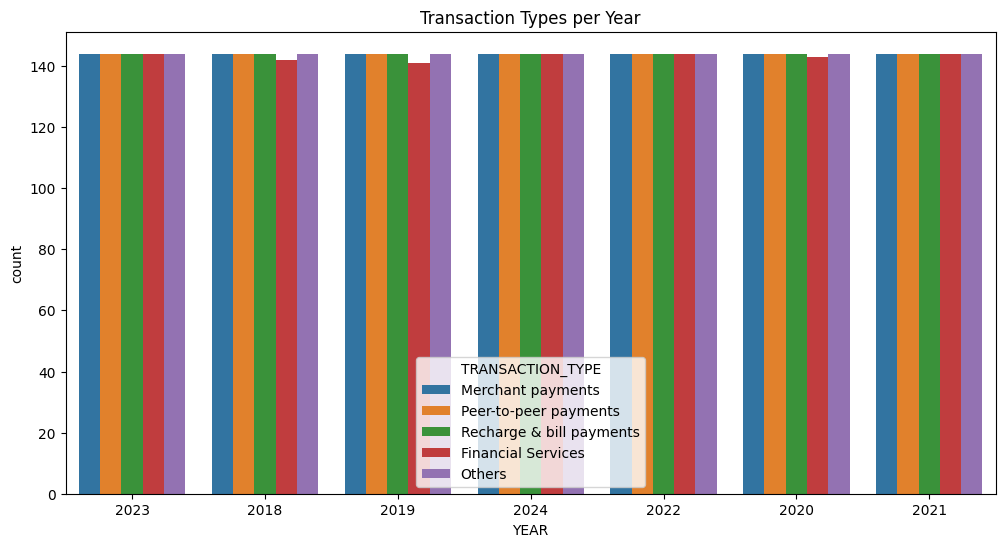

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transaction types over years
plt.figure(figsize=(12,6))
sns.countplot(data=df_agg_trans, x='YEAR', hue='TRANSACTION_TYPE')
plt.title("Transaction Types per Year")
plt.show()

Aggregated User

/tmp/ipython-input-89-1216599039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_grouped, x='YEAR', y='COUNT', palette='Blues_d')


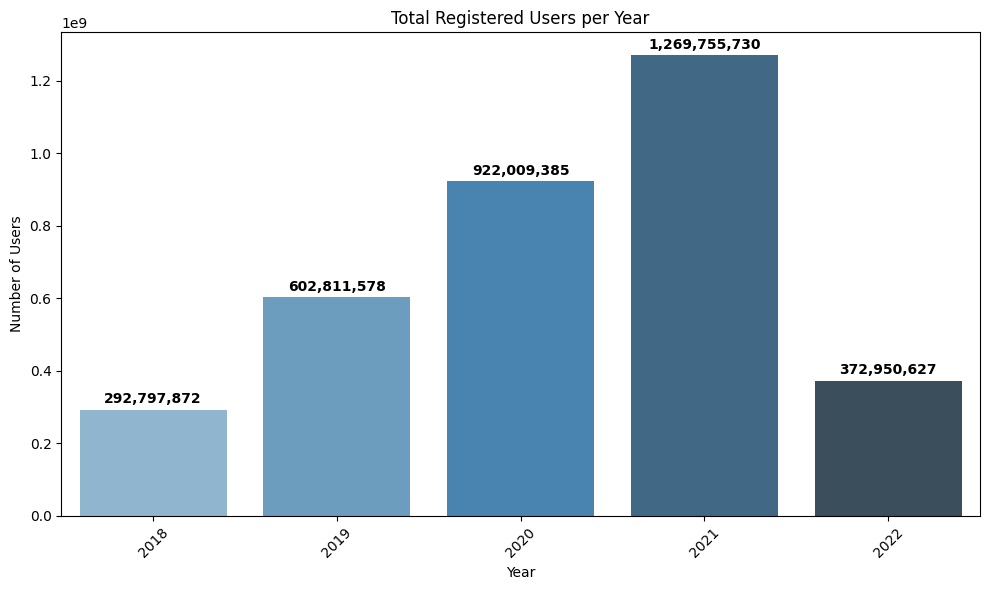

In [89]:
#Registered Users per Year
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data to get total registered users per year
df_grouped = df_agg_user.groupby('YEAR')['COUNT'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_grouped, x='YEAR', y='COUNT', palette='Blues_d')

# Annotate each bar with the count
for index, row in df_grouped.iterrows():
    barplot.text(x=index, y=row['COUNT'] + 1e7,  # adjust the vertical position slightly
                 s=f"{int(row['COUNT']):,}",     # formatted number with commas
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Title and labels
plt.title("Total Registered Users per Year")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-90-1488153636.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=brand_data, x="BRAND", y="COUNT", palette=colors)


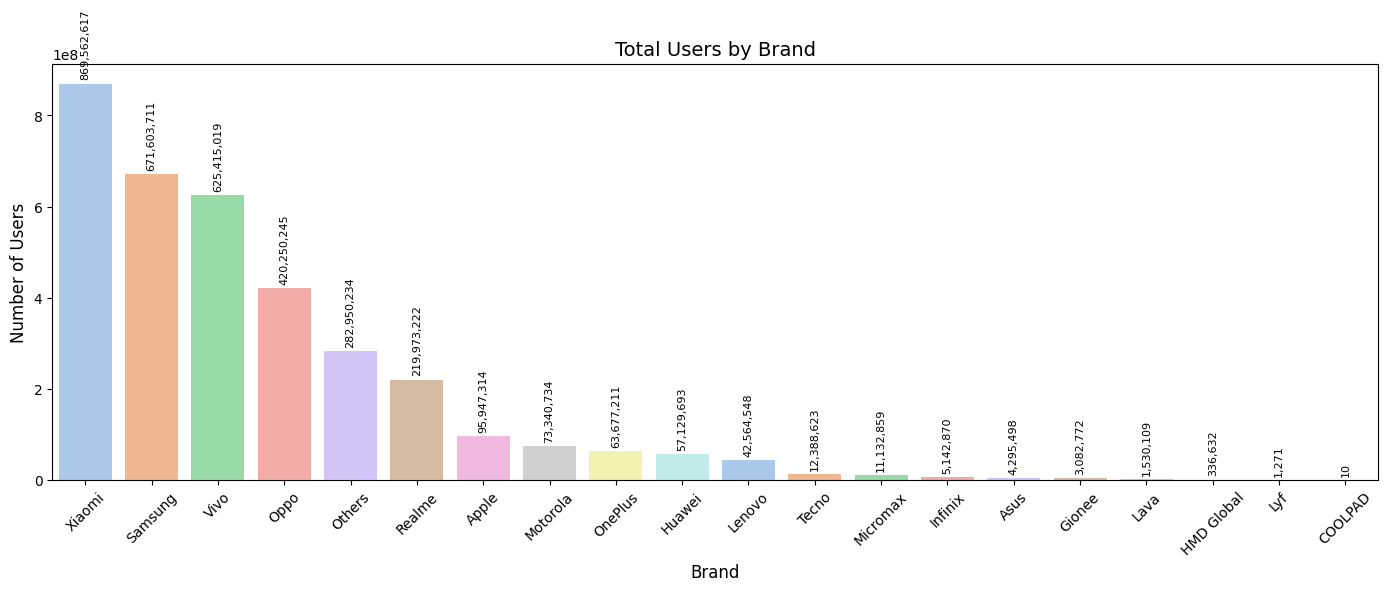

In [90]:
#Registered Users per Brand (across all years)
import matplotlib.pyplot as plt
import seaborn as sns

# Sort brand data by count
brand_data = df_agg_user.groupby("BRAND")["COUNT"].sum().reset_index()
brand_data = brand_data.sort_values(by="COUNT", ascending=False)

plt.figure(figsize=(14, 6))
colors = sns.color_palette("pastel", len(brand_data))

# Create the barplot
barplot = sns.barplot(data=brand_data, x="BRAND", y="COUNT", palette=colors)

# Add number labels on top of each bar
for i, row in enumerate(brand_data.itertuples()):
    value = int(row.COUNT)
    barplot.text(i, value + (0.01 * brand_data["COUNT"].max()), f"{value:,}",
                 ha='center', va='bottom', fontsize=8, rotation=90)

plt.title("Total Users by Brand", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Map Transaction Data

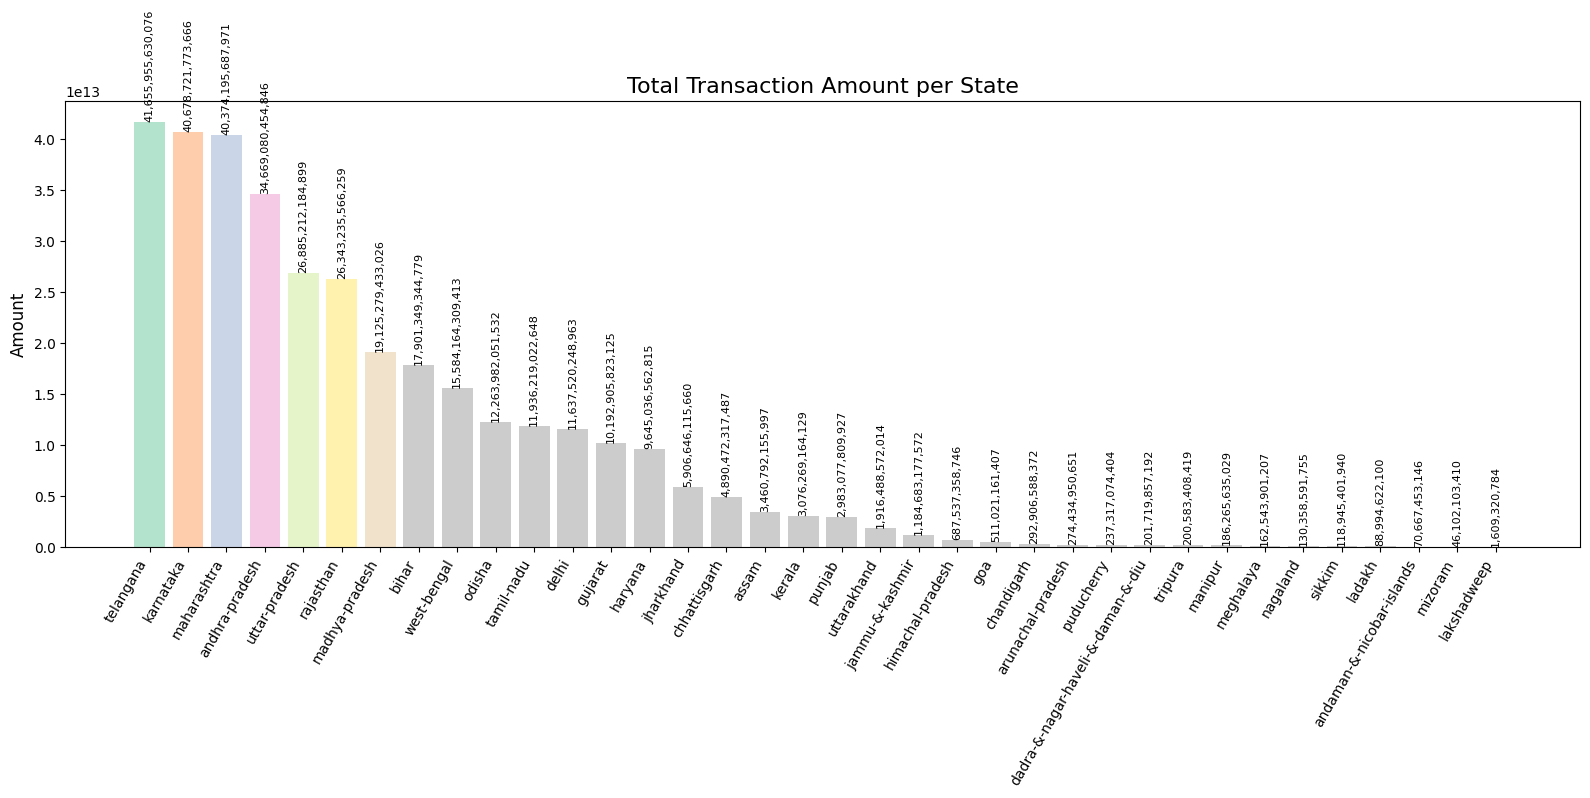

In [91]:
# Total amount per state
# Aggregate data
data = df_map_trans.groupby('STATE')['AMOUNT'].sum().sort_values(ascending=False)

# Set figure size large enough
plt.figure(figsize=(16, 8))

colors = plt.cm.Pastel2(range(len(data)))
bars = plt.bar(data.index, data.values, color=colors)

# Title and labels
plt.title("Total Transaction Amount per State", fontsize=16)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

Map User Data

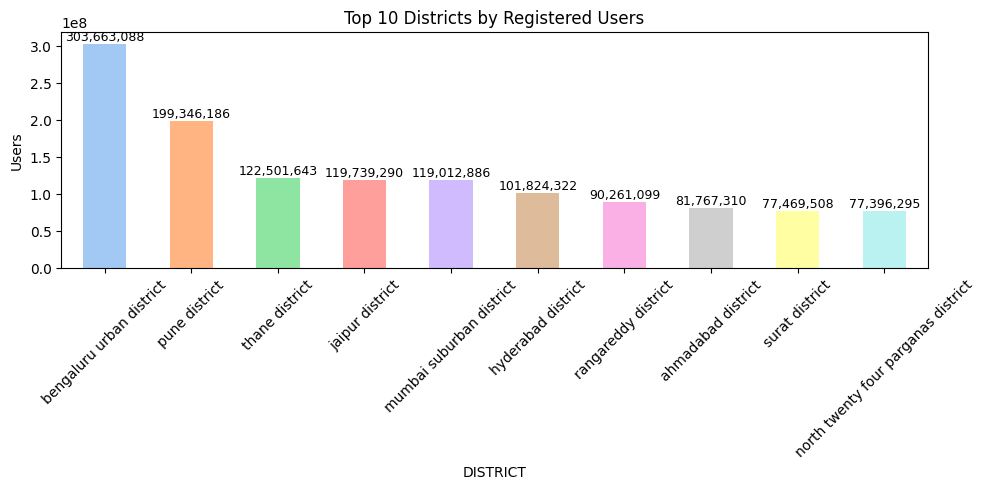

In [92]:
# Registered Users by Districts (Top 10)
top_districts = df_map_user.groupby('DISTRICT')['REGISTERED_USERS'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette("pastel")[:10]

ax = top_districts.plot(kind='bar', color=colors, title="Top 10 Districts by Registered Users", figsize=(10,5))
for i, val in enumerate(top_districts):
    ax.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.ylabel("Users")
plt.tight_layout()
plt.show()


Top Transaction

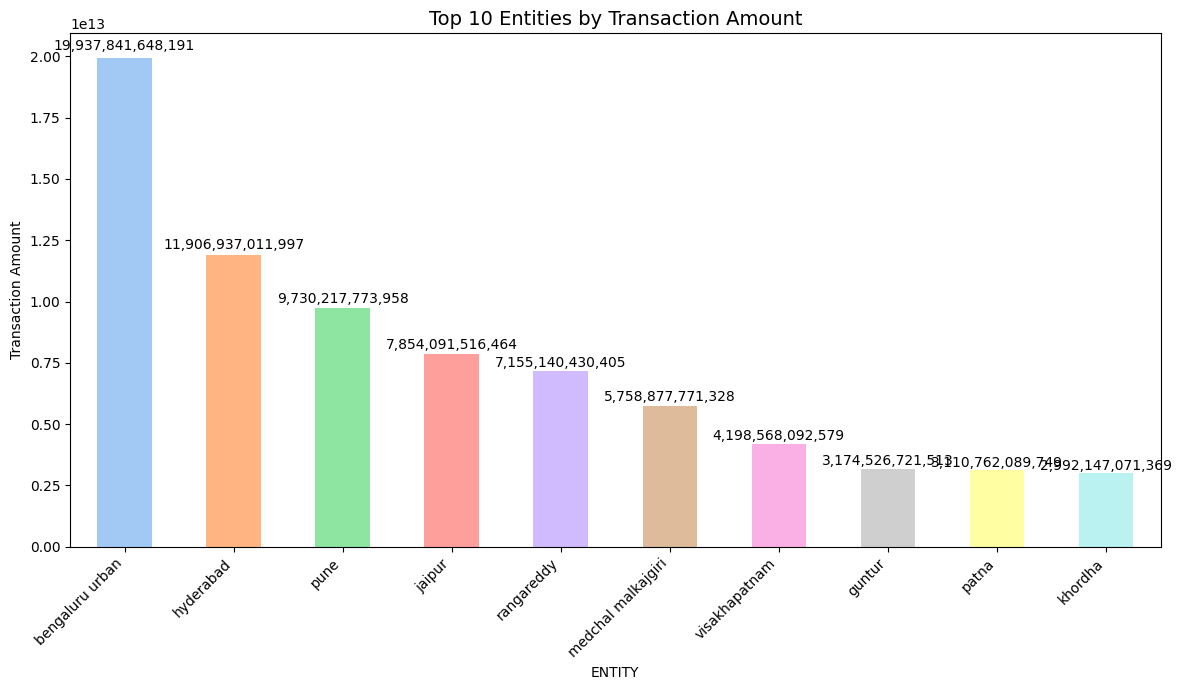

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 entities by transaction amount
top_entities = df_top_trans.groupby('ENTITY')['AMOUNT'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel")[:10]
ax = top_entities.plot(kind='bar', color=colors)

# Add labels above bars with spacing
for i, val in enumerate(top_entities):
    ax.text(i, val + val*0.01, f'{int(val):,}', ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Entities by Transaction Amount", fontsize=14)
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top User Data

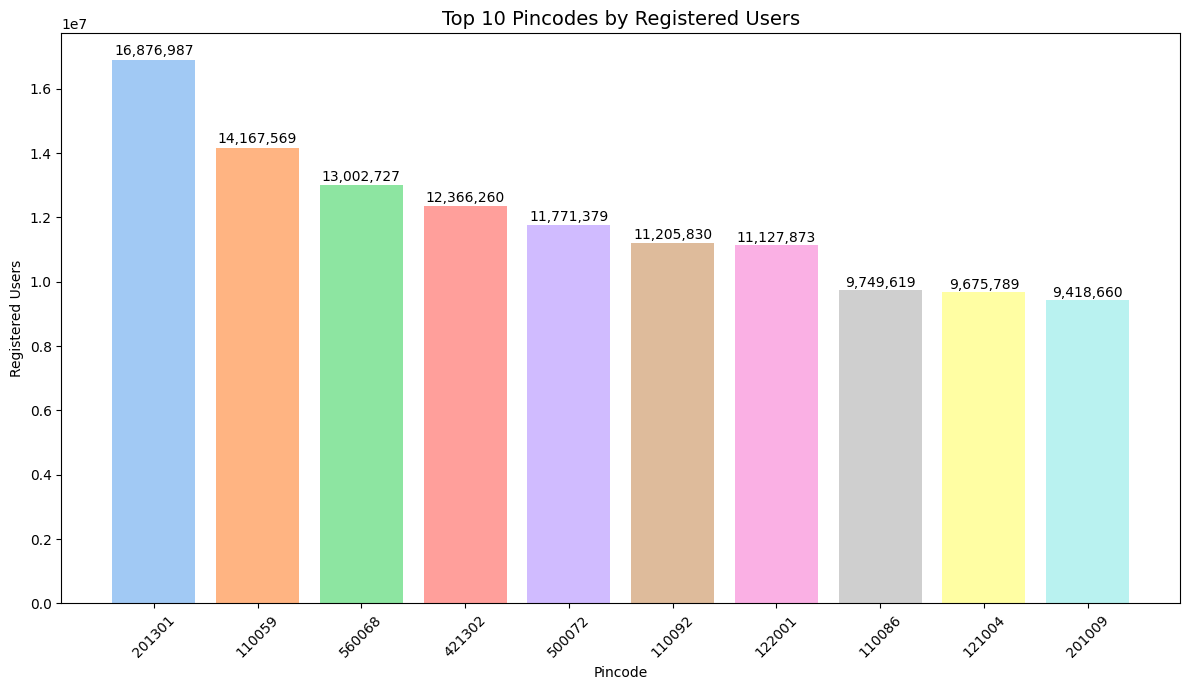

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 pincodes by registered users
top_users = df_top_user.groupby('PINCODE')['REGISTEREDUSERS'].sum().sort_values(ascending=False).head(10)

# Convert index to string to treat pincodes as categories
top_users.index = top_users.index.astype(str)

# Plot bar chart
plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel", n_colors=10)
bars = plt.bar(top_users.index, top_users.values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{int(yval):,}', ha='center', fontsize=10)

# Customize plot
plt.title("Top 10 Pincodes by Registered Users", fontsize=14)
plt.ylabel("Registered Users")
plt.xlabel("Pincode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Aggregated Insurance

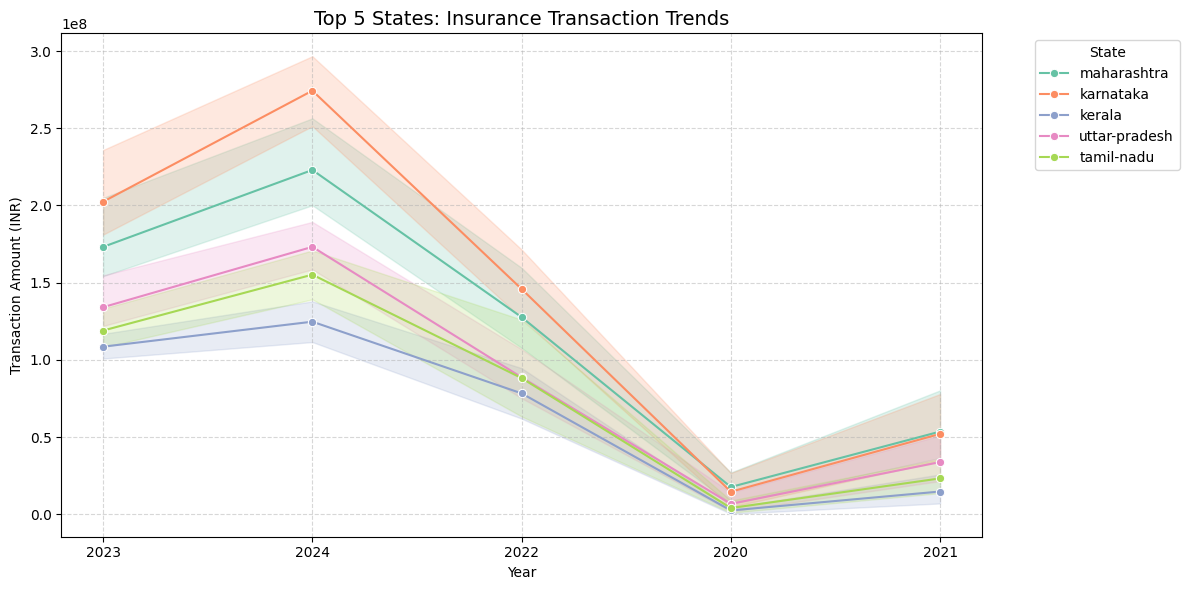

In [95]:
#Top 5 by total transaction amount
# First, remove commas or unwanted characters if any
df_agg_ins['TRANSACTION_AMOUNT'] = df_agg_ins['TRANSACTION_AMOUNT'].replace(',', '', regex=True)

# Convert to float
df_agg_ins['TRANSACTION_AMOUNT'] = pd.to_numeric(df_agg_ins['TRANSACTION_AMOUNT'], errors='coerce')

# Step 1: Calculate top 5 states by total transaction amount
top_states = df_agg_ins.groupby('STATE')['TRANSACTION_AMOUNT'].sum().nlargest(5).index

# Step 2: Filter the dataframe
filtered_df = df_agg_ins[df_agg_ins['STATE'].isin(top_states)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='YEAR', y='TRANSACTION_AMOUNT', hue='STATE', marker='o', palette='Set2')

plt.title("Top 5 States: Insurance Transaction Trends", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Transaction Amount (INR)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Top Insurance Data

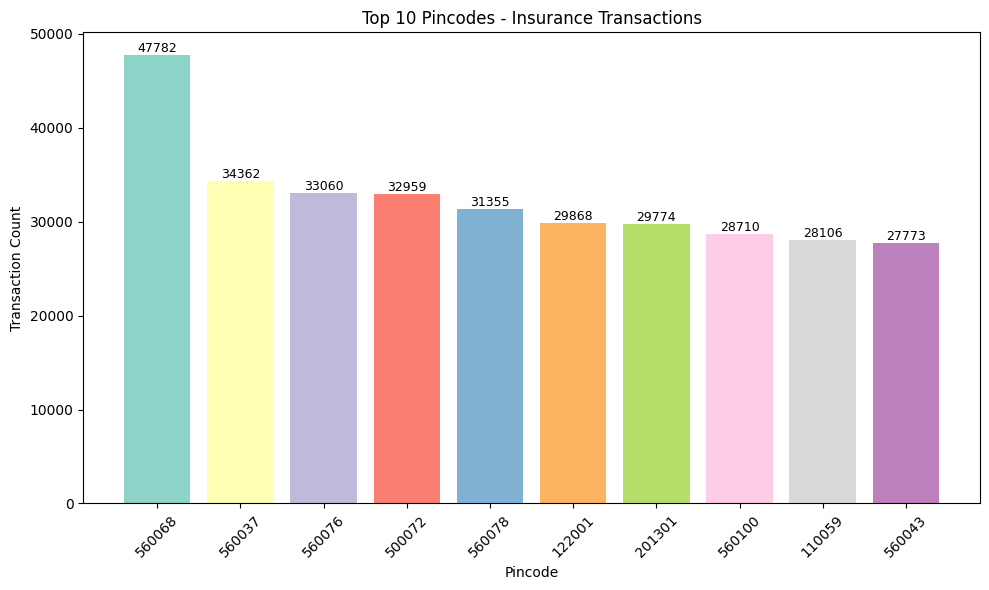

In [96]:
#Top Pincodes by Insurance Transaction Count

import matplotlib.pyplot as plt

# Convert TRANSACTION_COUNT to numeric
df_top_ins['TRANSACTION_COUNT'] = pd.to_numeric(df_top_ins['TRANSACTION_COUNT'], errors='coerce')

# Get top 10 pincodes
top_pins = df_top_ins.groupby('PINCODE')['TRANSACTION_COUNT'].sum().nlargest(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_pins.index.astype(str), top_pins.values, color=plt.cm.Set3.colors)

# Add number labels on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

plt.title("Top 10 Pincodes - Insurance Transactions")
plt.xlabel("Pincode")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [97]:
#Top 5 States Insurance Trends Over Years
import plotly.express as px
import pandas as pd

# Ensure TRANSACTION_AMOUNT is numeric
df_agg_ins['TRANSACTION_AMOUNT'] = pd.to_numeric(df_agg_ins['TRANSACTION_AMOUNT'], errors='coerce')

# Top 5 states
top_states = df_agg_ins.groupby('STATE')['TRANSACTION_AMOUNT'].sum().nlargest(5).index
filtered_df = df_agg_ins[df_agg_ins['STATE'].isin(top_states)]

fig = px.line(filtered_df, x='YEAR', y='TRANSACTION_AMOUNT', color='STATE',
              title="Top 5 States: Insurance Transaction Trend Over Years",
              markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Transaction Amount (INR)', template='plotly_dark')
fig.show()


In [98]:
#Share of Top 5 States by Total Transaction Amount
top_state_data = df_agg_ins[df_agg_ins['STATE'].isin(top_states)]
state_totals = top_state_data.groupby('STATE')['TRANSACTION_AMOUNT'].sum().reset_index()

fig = px.pie(state_totals, names='STATE', values='TRANSACTION_AMOUNT',
             title='Share of Total Insurance Transactions (Top 5 States)',
             hole=0.4)  # donut chart

fig.update_traces(textinfo='percent+label')
fig.update_layout(template='plotly_dark')
fig.show()


In [99]:
#Insurance Trend for One State
one_state = df_agg_ins[df_agg_ins['STATE'] == top_states[0]]  # First top state

fig = px.area(one_state, x='YEAR', y='TRANSACTION_AMOUNT',
              title=f"Insurance Transaction Trend: {top_states[0]}", color_discrete_sequence=['orange'])

fig.update_layout(xaxis_title='Year', yaxis_title='Amount', template='plotly_white')
fig.show()


In [100]:
#State-wise Insurance Transaction Amount
state_totals = df_agg_ins.groupby('STATE')['TRANSACTION_AMOUNT'].sum().reset_index()
state_totals = state_totals.sort_values(by='TRANSACTION_AMOUNT', ascending=False)

fig = px.bar(state_totals, x='STATE', y='TRANSACTION_AMOUNT',
             title='Total Insurance Transaction Amount by State',
             text='TRANSACTION_AMOUNT', color='TRANSACTION_AMOUNT',
             color_continuous_scale='Plasma')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, template='plotly_white')
fig.show()


In [101]:
#Year-wise Total Insurance Transaction Trend
year_totals = df_agg_ins.groupby('YEAR')['TRANSACTION_AMOUNT'].sum().reset_index()

fig = px.area(year_totals, x='YEAR', y='TRANSACTION_AMOUNT',
              title='Year-wise Total Insurance Transaction Amount',
              color_discrete_sequence=['mediumturquoise'])

fig.update_layout(template='plotly_dark')
fig.show()


In [102]:
#Distribution of Transactions Across States
fig = px.box(df_agg_ins, x='STATE', y='TRANSACTION_AMOUNT',
             title='Distribution of Insurance Transactions Across States',
             color='STATE')

fig.update_layout(xaxis_tickangle=-45, template='plotly_white')
fig.show()



In [103]:
#Frequency Distribution of Transaction Amounts
fig = px.histogram(df_agg_ins, x='TRANSACTION_AMOUNT', nbins=50,
                   title='Distribution of Insurance Transaction Amounts',
                   color_discrete_sequence=['salmon'])

fig.update_layout(template='plotly_white')
fig.show()


In [104]:
#Pincode-wise Transaction Count
top_pins = df_top_ins.groupby('PINCODE')['TRANSACTION_COUNT'].sum().nlargest(20).reset_index()

fig = px.treemap(top_pins, path=['PINCODE'], values='TRANSACTION_COUNT',
                 title='Top 20 Pincodes by Insurance Transactions')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


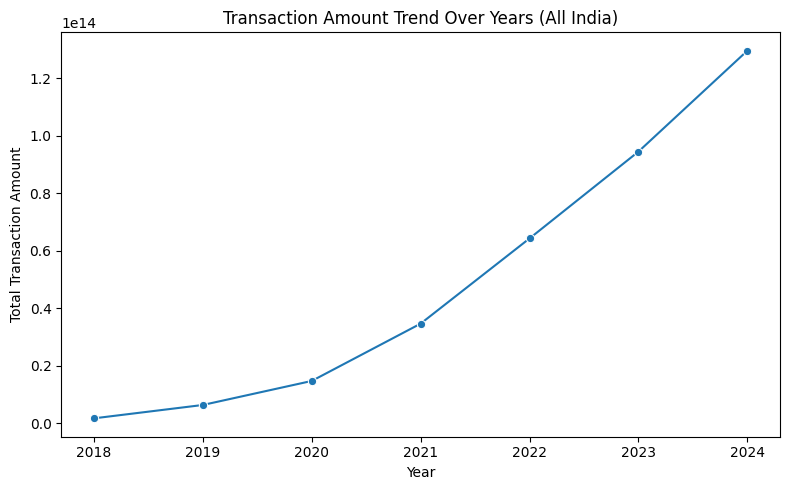

In [105]:
# Transaction Trend Over Years (All India)
year_trend = df_agg.groupby('Year')['Transaction_amount'].sum()
plt.figure(figsize=(8,5))
sns.lineplot(x=year_trend.index, y=year_trend.values, marker='o')
plt.title('Transaction Amount Trend Over Years (All India)')
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

In [106]:
from google.colab import files

files.download('phonepe_agg_transaction.csv')
files.download('phonepe_user.csv')
files.download('phonepe_map_transaction.csv')
files.download('phonepe_top_transaction.csv')
files.download('phonepe_map_user.csv')
files.download('phonepe_top_user.csv')
files.download('phonepe_agg_insurance.csv')
files.download('phonepe_map_insurance.csv')
files.download('phonepe_top_insurance.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
import pandas as pd

# List of Indian states from PhonePe Pulse
states = [
    'andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh', 'assam', 'bihar',
    'chandigarh', 'chhattisgarh', 'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa',
    'gujarat', 'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand', 'karnataka',
    'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh', 'maharashtra', 'manipur', 'meghalaya',
    'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil-nadu',
    'telangana', 'tripura', 'uttar-pradesh', 'uttarakhand', 'west-bengal'
]

years = [2018, 2019, 2020, 2021, 2022, 2023]
quarters = [1, 2, 3, 4]

# Create the combinations
dim_table = pd.DataFrame([
    {'State': state, 'Year': year, 'Quarter': quarter}
    for state in states
    for year in years
    for quarter in quarters
])

# Save to CSV
dim_table.to_csv("dim_state_year_quarter.csv", index=False)
print("CSV created successfully!")


CSV created successfully!


In [108]:
from google.colab import files
files.download("dim_state_year_quarter.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
# Filter for 2018 and 2019
df_check = df_agg[df_agg['Year'].isin(['2018', '2019'])]

# See how many rows exist and whether Transaction_amount is present
print("Total rows:", len(df_check))
print(df_check[['State', 'Year', 'Quater', 'Transaction_type', 'Transaction_amount']].head(10))


Total rows: 1435
    State  Year  Quater          Transaction_type  Transaction_amount
20  assam  2018       1  Recharge & bill payments        9.349118e+07
21  assam  2018       1     Peer-to-peer payments        9.935252e+08
22  assam  2018       1         Merchant payments        3.450162e+07
23  assam  2018       1        Financial Services        4.936862e+06
24  assam  2018       1                    Others        3.134959e+07
25  assam  2018       2  Recharge & bill payments        1.744275e+08
26  assam  2018       2     Peer-to-peer payments        2.064314e+09
27  assam  2018       2         Merchant payments        7.336634e+07
28  assam  2018       2        Financial Services        7.051505e+06
29  assam  2018       2                    Others        3.142575e+07


In [110]:
#Install libraries
!pip install plotly pandas


In [111]:
#Import libraries
import sqlite3
import pandas as pd
import plotly.express as px


In [112]:
# Connect to the SQLite database
conn = sqlite3.connect("/content/phonepe.db")

In [113]:
#Load Data into DataFrame
import sqlite3

conn = sqlite3.connect("pulse.db")
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:")
for t in tables:
    print(t[0])



Tables in database:
TRANSACTION_DATA
USER_DATA
MAP_TRANSACTION_DATA
TOP_TRANSACTION_DATA
MAP_USER_DATA
TOP_USER_DATA
AGGREGATED_INSURANCE_DATA
MAP_INSURANCE_DATA
TOP_INSURANCE_DATA
